In [1]:
import numpy as np
import twutils.QO.ionization as iz
from matplotlib import pyplot as plt

In [2]:
Uion = 0.5
Z = 1.0
w = 0.057

In [3]:
adk = iz.ADK(True,Uion,Z)
adk00 = iz.ADK00(True,Uion,Z)
print('ADK and simplified ADK rates in the limit (should agree)',adk.Rate(0.1),adk00.Rate(0.1))

ADK and simplified ADK rates in the limit (should agree) 0.01966363695364837 0.01966363695364837


Text(0, 0.5, 'Ratio of Rates')

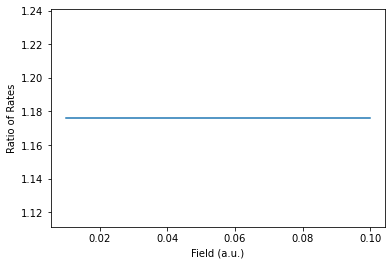

In [4]:
# ADK and PPT (in tunneling limit) should differ by constant 18% for hydrogen
E_range = np.logspace(-2,-1,32)
adk = iz.ADK(True,0.5,1.0)
ppt = iz.PPT_Tunneling(True,0.5,1.0)
plt.plot(E_range,adk.Rate(E_range)/ppt.Rate(E_range))
plt.xlabel('Field (a.u.)')
plt.ylabel('Ratio of Rates')

Text(0, 0.5, 'Rate (a.u.)')

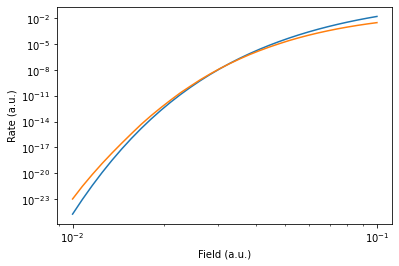

In [5]:
# Have a look at PPT tunneling vs. full PPT with lots of terms.
# Note we have trouble agreeing in the tunneling limit due to slow convergence.
E_range = np.logspace(-2,-1,32)
pptt = iz.PPT_Tunneling(True,Uion,Z)
ppt = iz.PPT(True,Uion,Z,0,0,0,.01,50)
plt.loglog(E_range,pptt.Rate(E_range))
plt.loglog(E_range,ppt.Rate(E_range))
plt.xlabel('Field (a.u.)')
plt.ylabel('Rate (a.u.)')

Keldysh at E=.001 = 100.0


Text(0, 0.5, 'Rate (a.u.)')

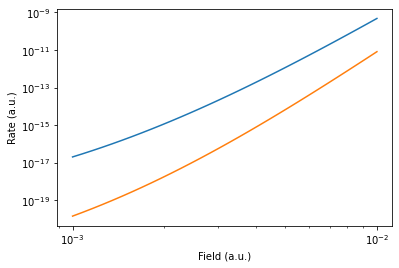

In [6]:
# Compare PPT and PMPB in the multiphoton regime
E_range = np.logspace(-3,-2,32)
w0 = 0.1
ppt = iz.PPT(True,Uion,Z,0,0,0,w0,50)
pmpb = iz.PMPB(True,Uion,Z,0,0,0,w0,50)
print('Keldysh at E=.001 =',iz.Keldysh_Parameter(w0,Uion,.001))
plt.loglog(E_range,ppt.Rate(E_range))
plt.loglog(E_range,pmpb.Rate(E_range))
plt.xlabel('Field (a.u.)')
plt.ylabel('Rate (a.u.)')

Text(0, 0.5, 'Rate (a.u.)')

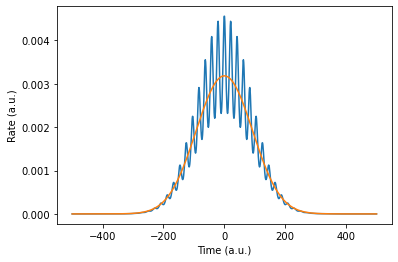

In [7]:
# Compare YI and PPT
# Note (i) YI can give something between constant and bursting current
# Note (ii) PPT should integrate to the same thing as YI
w0 = 0.15
t = np.linspace(-500,500,1000)
amp = .05*np.exp(-t**2/300**2)
phase = w0*t
yi = iz.YI(False,Uion,Z,0,0,0,w0,50)
ppt = iz.PPT(True,Uion,Z,0,0,0,w0,50)
plt.plot(t,yi.Rate(amp,phase))
plt.plot(t,ppt.Rate(amp))
plt.xlabel('Time (a.u.)')
plt.ylabel('Rate (a.u.)')